In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 10,6

In [2]:
df=pd.read_csv("zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.shape

(51717, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df["approx_cost(for two people)"].fillna("0",inplace=True)

In [6]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].str.replace(",","").astype("int")

In [7]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].map(lambda x:np.nan if x=="0" else x)

In [8]:
df[["rate","rating"]]=df["rate"].str.split("/",expand=True)
df.drop(columns=["rating"],inplace=True)

In [9]:
df["rate"]=df["rate"].map(lambda x:0 if x=="NEW" or x=="-" else x)
df["rate"]=df["rate"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51717 non-null  int64  
 13  reviews_list    

In [11]:
df["rate"]=df["rate"].map(lambda x:np.nan if x==0 else x)

In [12]:
df.describe(include="all")

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,41665.000000,51717.000000,50509,51696,51490,23639,51672,51717.000000,51717,51717,51717,51717
unique,51717,11495,8792,2,2,NaN,NaN,14926,93,93,5271,2723,NaN,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NaN,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,NaN,[],[],Delivery,BTM
freq,1,128,96,30444,45268,NaN,NaN,216,5124,19132,182,2913,NaN,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,3.700449,283.697527,NaN,NaN,NaN,NaN,NaN,551.715587,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.440513,803.838853,NaN,NaN,NaN,NaN,NaN,439.717709,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.800000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.400000,7.000000,NaN,NaN,NaN,NaN,NaN,300.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.700000,41.000000,NaN,NaN,NaN,NaN,NaN,400.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.000000,198.000000,NaN,NaN,NaN,NaN,NaN,650.000000,NaN,NaN,NaN,NaN


Skewness of rate is -0.32860079817829163
Kurtosis of rate is -0.007483378127147944
Minimum value in rate is 1.8
Maximum value in rate is 4.9
Mean value in rate is 3.700448817952717
Median value in rate is 3.7
Mode value in rate is 3.9


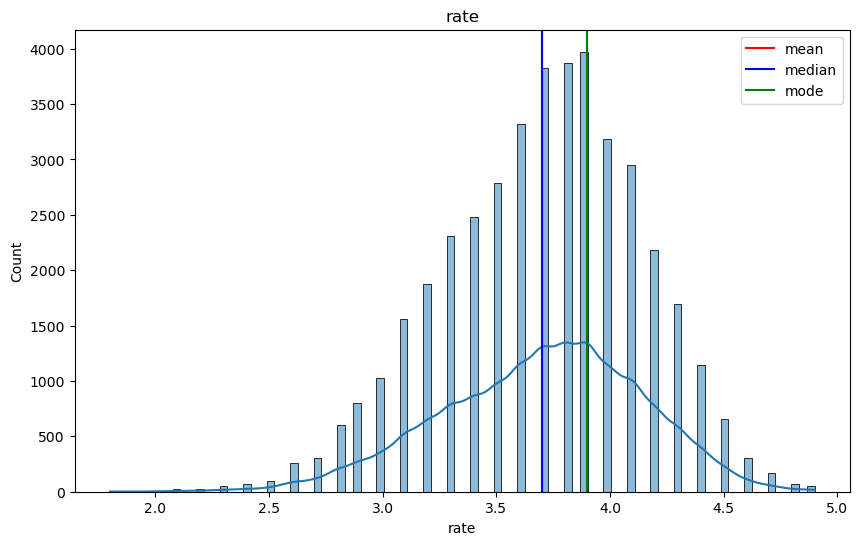

Skewness of votes is 7.547819350060049
Kurtosis of votes is 88.8667383335981
Minimum value in votes is 0
Maximum value in votes is 16832
Mean value in votes is 283.69752692538236
Median value in votes is 41.0
Mode value in votes is 0


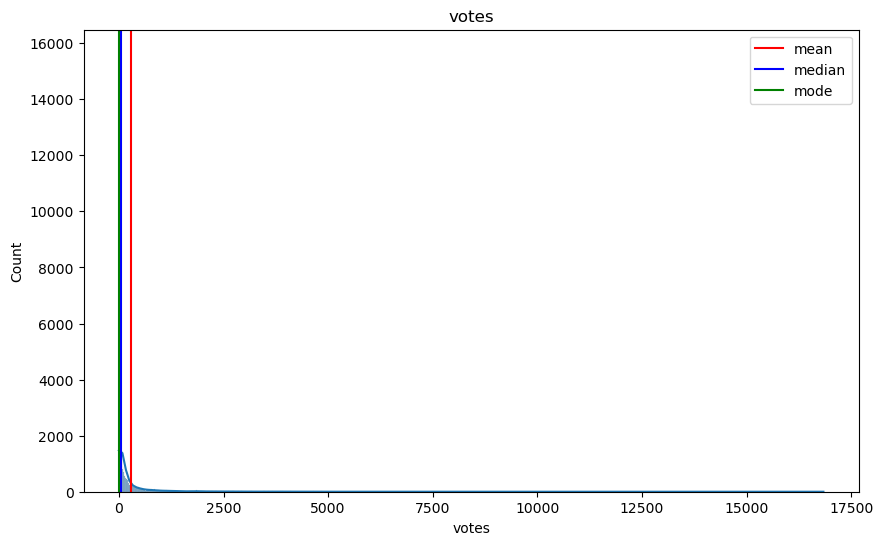

Skewness of approx_cost(for two people) is 2.581186278265623
Kurtosis of approx_cost(for two people) is 10.358700407964527
Minimum value in approx_cost(for two people) is 0
Maximum value in approx_cost(for two people) is 6000
Mean value in approx_cost(for two people) is 551.7155867509716
Median value in approx_cost(for two people) is 400.0
Mode value in approx_cost(for two people) is 300


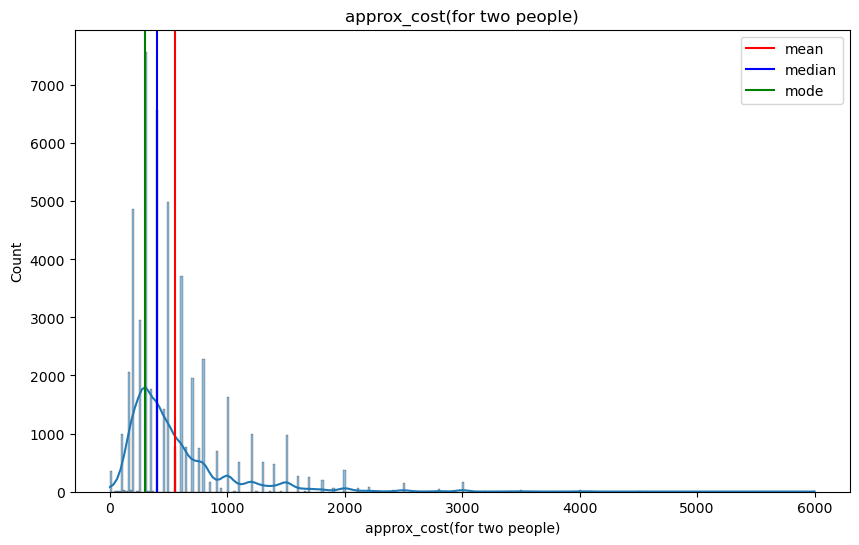

In [13]:
for i in df.select_dtypes(include=np.number):
    sns.histplot(df[i],kde=True)
    plt.axvline(x=df[i].mean(),label="mean",color="r")
    plt.axvline(x=df[i].median(),label="median",color="b")
    plt.axvline(x=df[i].mode()[0],label="mode",color="g")
    plt.legend()
    plt.title(i)
    print("Skewness of",i,"is",df[i].skew())
    print("Kurtosis of",i,"is",df[i].kurt())
    print("Minimum value in",i,"is",df[i].min())
    print("Maximum value in",i,"is",df[i].max())
    print("Mean value in",i,"is",df[i].mean())
    print("Median value in",i,"is",df[i].median())
    print("Mode value in",i,"is",df[i].mode()[0])
    plt.show()

In [14]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].median(),inplace=True)

In [15]:
for i in df.select_dtypes(exclude=np.number):
    df[i].fillna(df[i].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

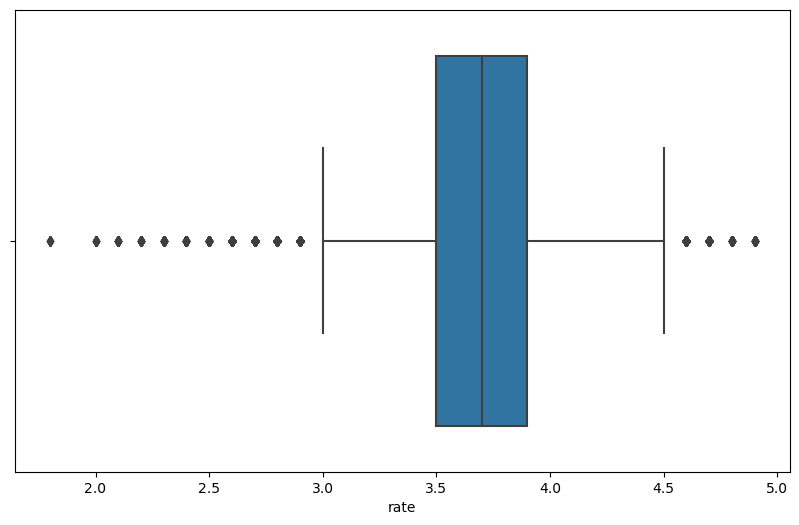

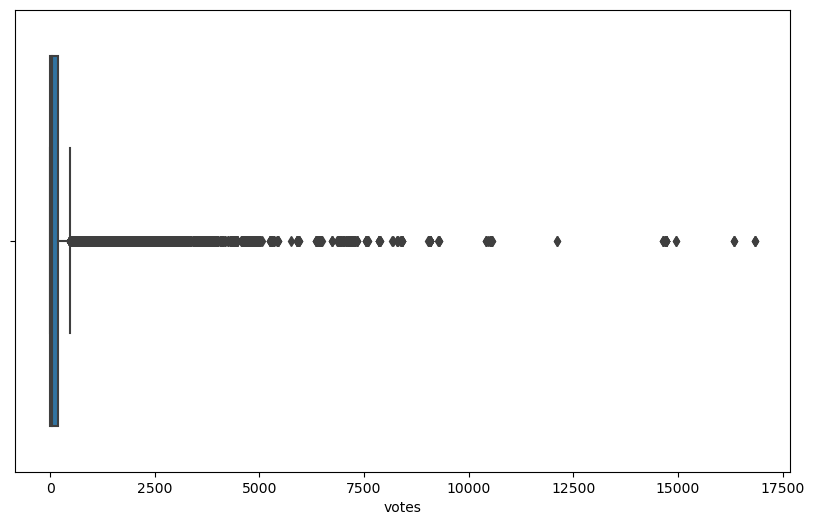

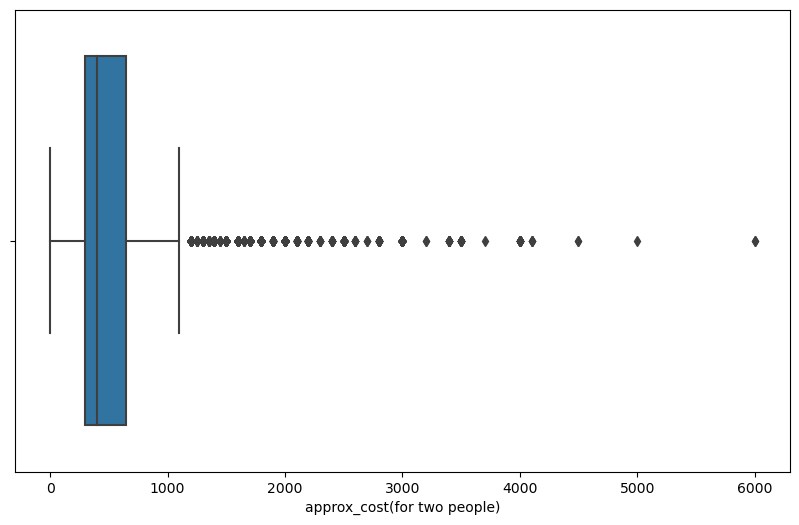

In [17]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [18]:
df1=df[["name","online_order","book_table","location","rest_type","dish_liked","cuisines","rest_type","listed_in(city)"]]

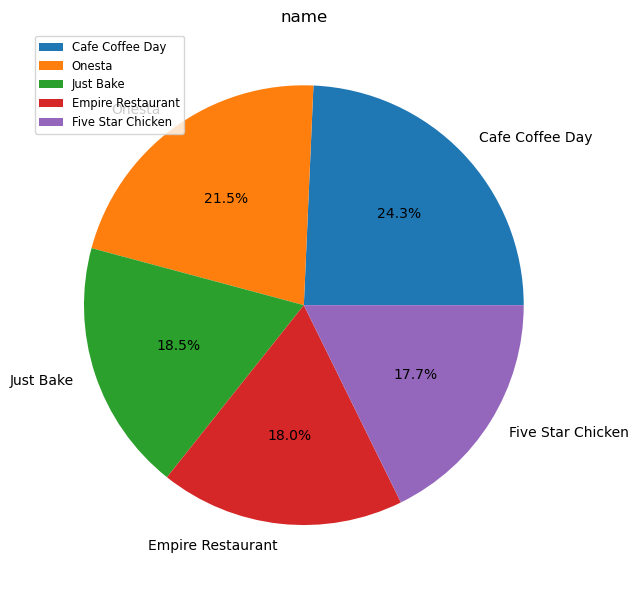

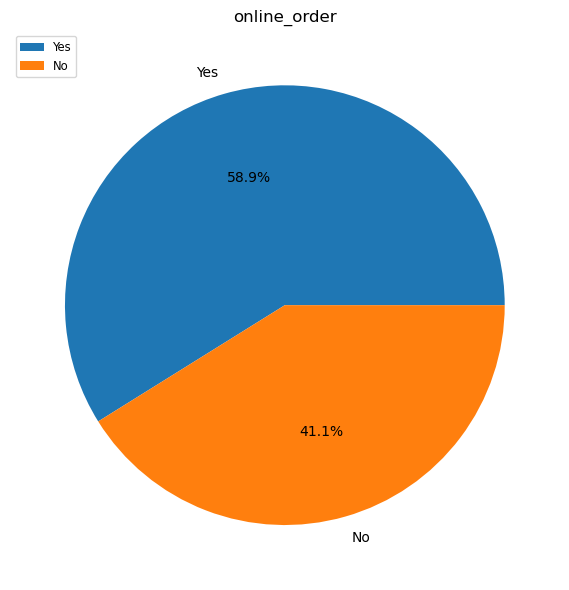

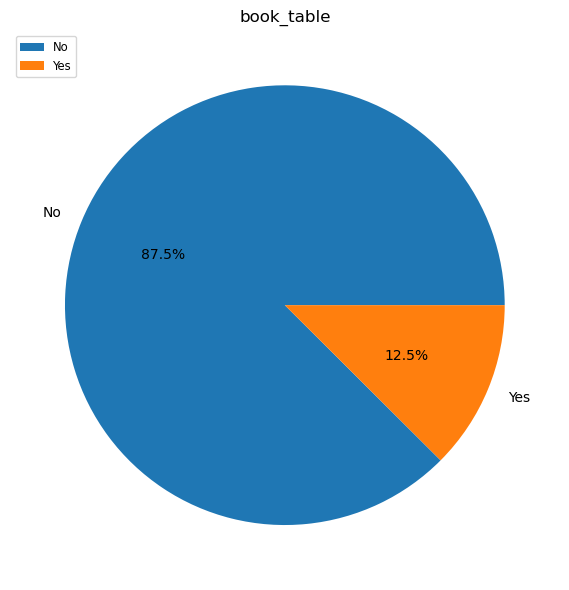

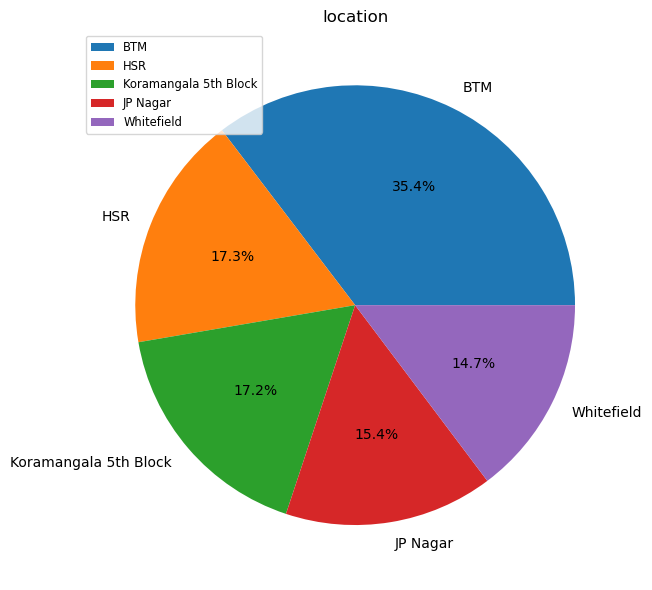

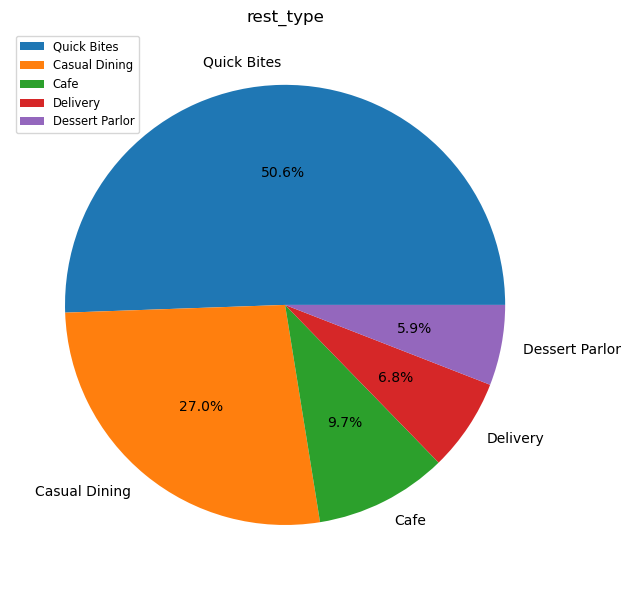

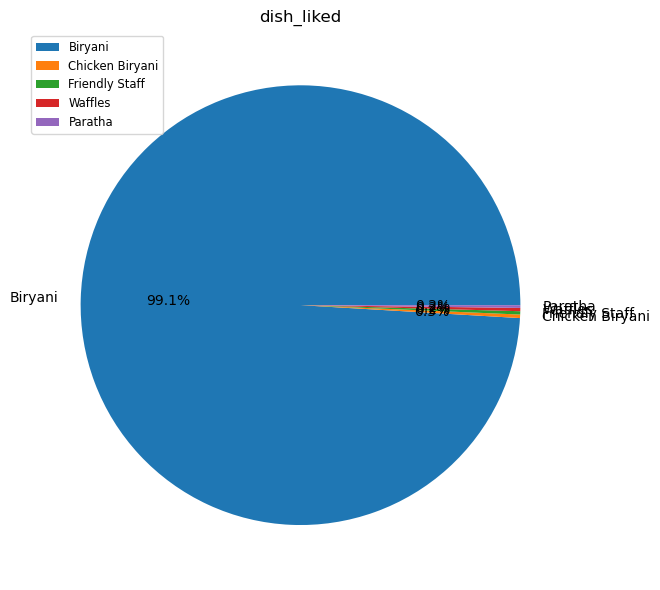

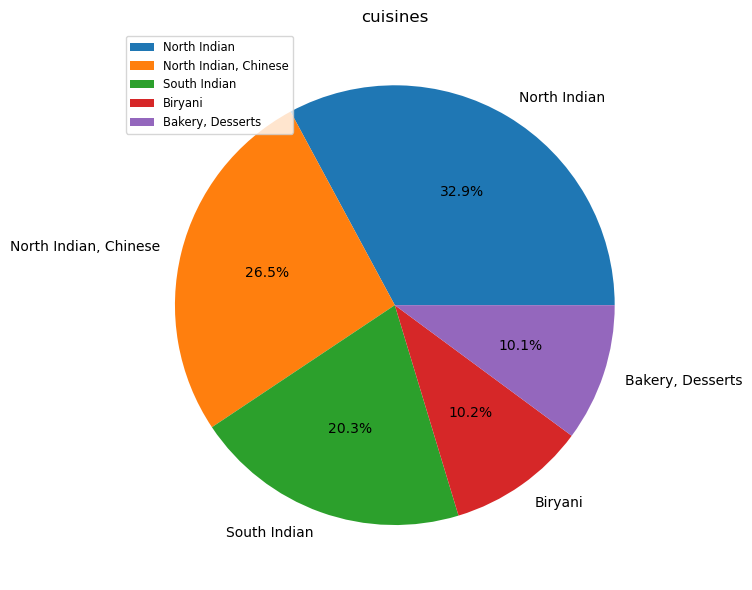

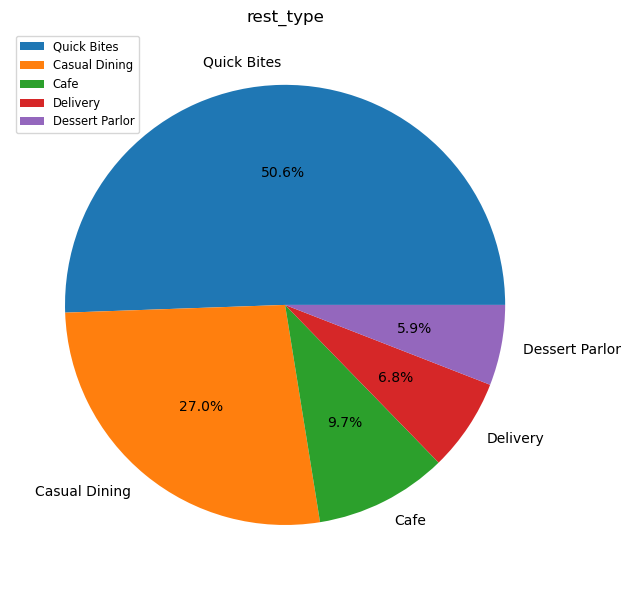

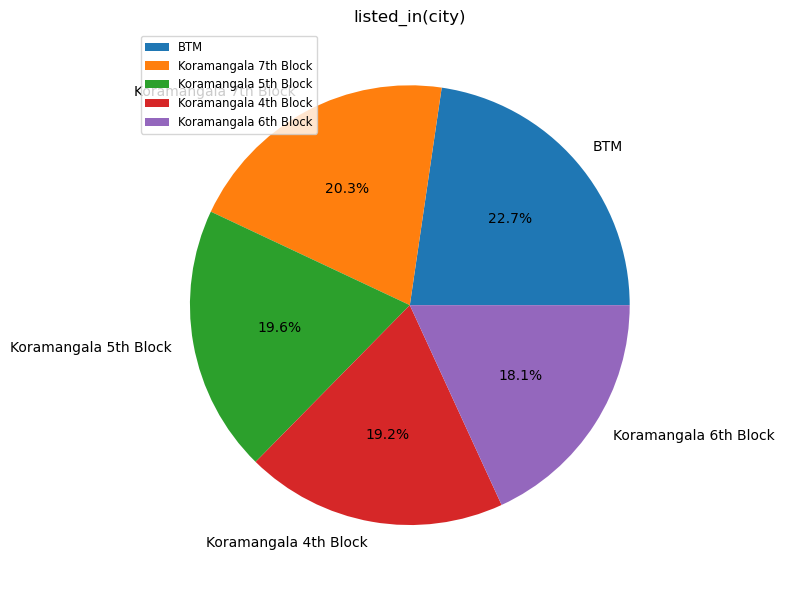

In [19]:
for i in df1.columns:
    r_counts=df[i].value_counts().head()
    plt.figure(figsize=(8, 6))
    plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
    plt.title(i)
    plt.legend(fontsize="small",loc="upper left")
    plt.tight_layout()
    plt.show()

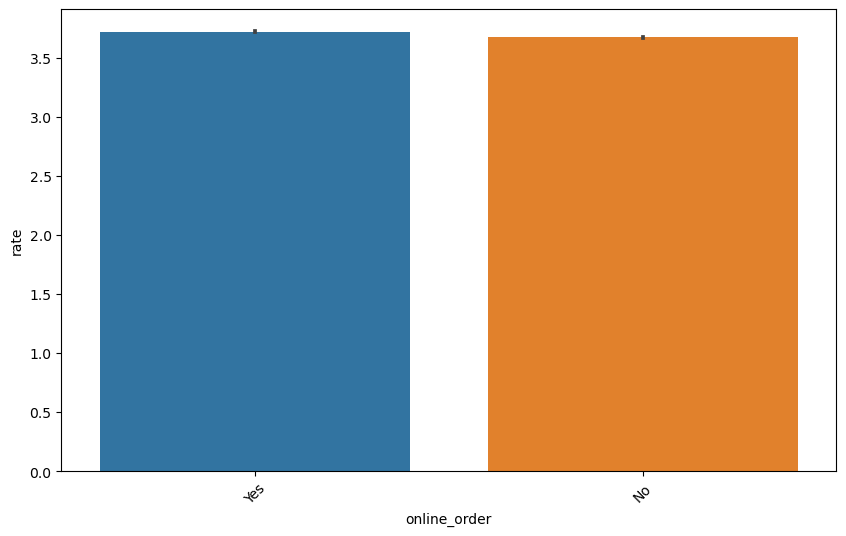

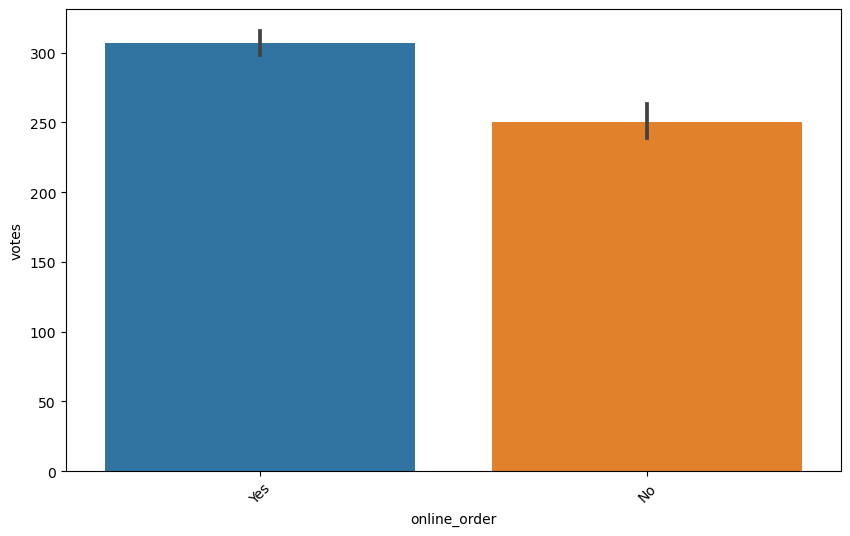

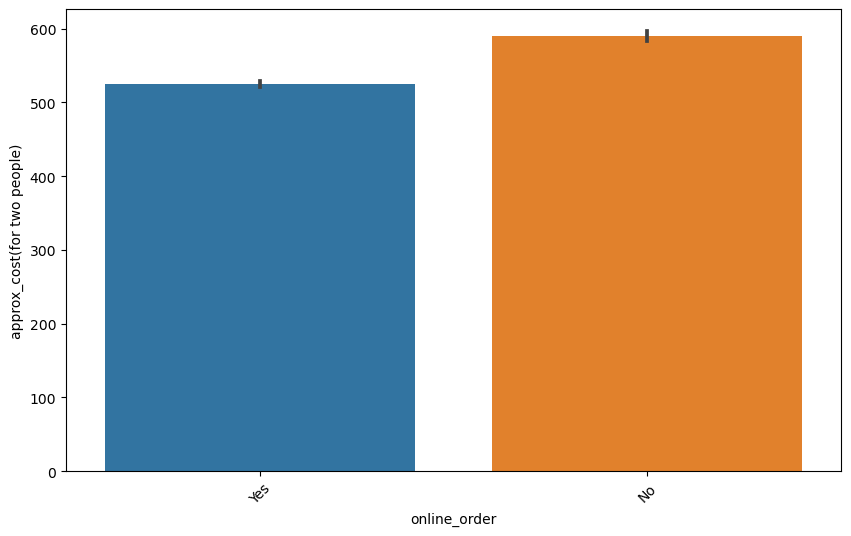

In [20]:
for i in df.select_dtypes(include=np.number):
    sns.barplot(x=df["online_order"], y=df[i])
    plt.xlabel('online_order')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.show()

# Outlier Treatment
#### Considering 3 standard deviation

In [21]:
for i in df.select_dtypes(include=np.number):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    uwf=q3+1.5*iqr
    lwf=q1-1.5*iqr
    df[i]=df[i].map(lambda x: uwf if x>uwf else lwf if x<lwf else x)

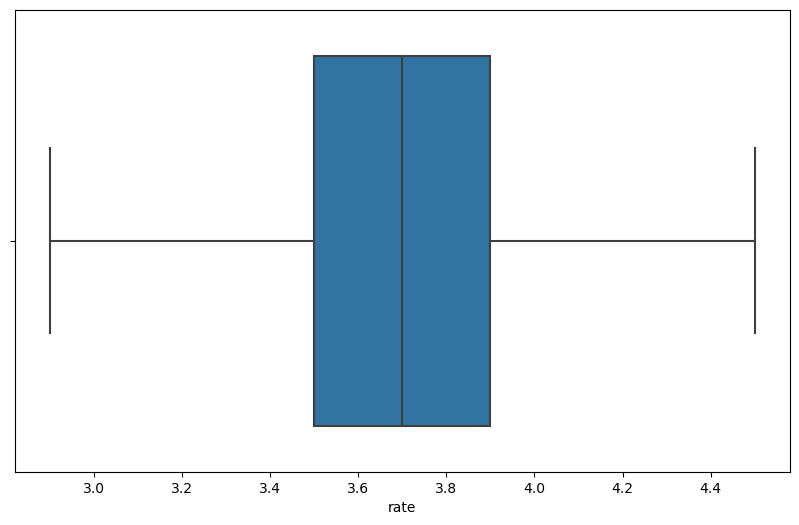

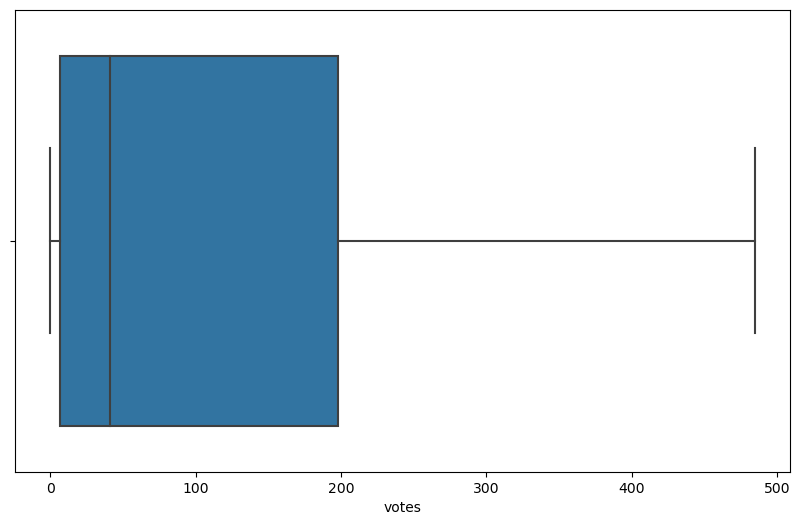

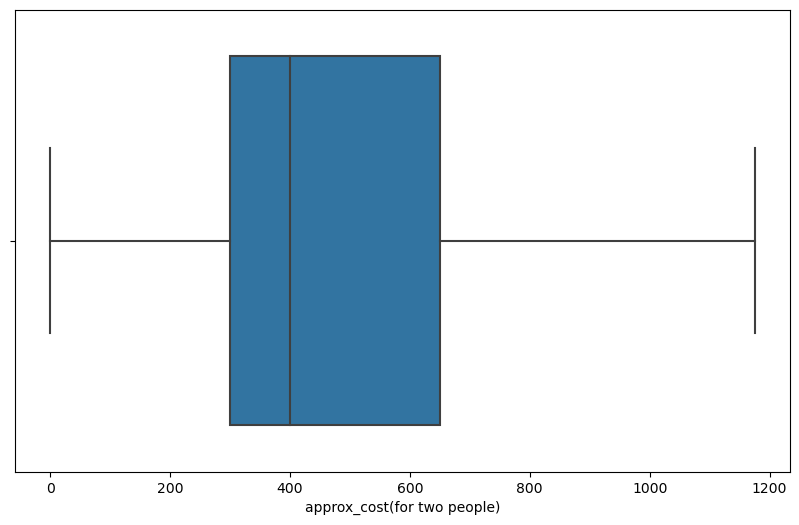

In [22]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()
# The outliers have been treated

### Feature Extraction

In [23]:
df["rate"].min(),df["rate"].max(),df["rate"].mean()

(2.9000000000000004, 4.5, 3.7052535916625806)

In [24]:
df["Location"]=df["listed_in(city)"].map(lambda x: "North" if x in ["Nagawara", "Hennur", "Kalyan Nagar", "New BEL Road", "Jakkur", "Rammurthy Nagar", "Thippasandra", "Kaggadasapura", "Hebbal", "Kengeri", "Sankey Road", "Sadashiv Nagar"] else "South" if x in ["Banashankari", "Basavanagudi", "Mysore Road", "Jayanagar", "Kumaraswamy Layout", "Rajarajeshwari Nagar", "Vijay Nagar", "Uttarahalli", "JP Nagar", "South Bangalore", "Bannerghatta Road", "BTM", "Kanakapura Road", "Bommanahalli", "Wilson Garden", "Shanti Nagar", "Koramangala 5th Block", "Koramangala 8th Block", "Richmond Road", "Koramangala 7th Block", "Jalahalli", "Koramangala 4th Block"] else "East" if x in ["Bellandur", "Whitefield", "Old Airport Road", "Indiranagar", "Marathahalli", "Sarjapur Road", "CV Raman Nagar", "Electronic City"] else "West" if x in ["Rajajinagar", "Malleshwaram", "Basaveshwara Nagar", "Yeshwantpur", "Magadi Road", "Yelahanka", "Sahakara Nagar", "Peenya"] else "Central")

In [25]:
df["Rate_Type"]=df["rate"].map(lambda x: "Average" if (x>=2.9) and (x<=3.7) else "Good")

In [26]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [27]:
df1=df.drop(columns=["url","address","name","phone","location","rest_type","dish_liked","cuisines","reviews_list","menu_item","listed_in(city)"])

## Statistical Testing

In [28]:
# online_order
# H0:Not significant
# H1: Significant
# Alpha =0.05
import scipy.stats as stats

group_a = df[df['online_order'] == 'Yes']['approx_cost(for two people)']
group_b = df[df['online_order'] == 'No']['approx_cost(for two people)']

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 0.0021562846757445203
Reject H0


In [29]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['online_order'], df['book_table']) 
chi2, p, dof, expected = chi2_contingency(contingency_table) 
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared Statistic: 0.04916889694781414
P-value: 0.8245158168175444
Degrees of Freedom: 1
Expected Frequencies:
[[18620.30210569  2652.69789431]
 [26647.69789431  3796.30210569]]


In [30]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['online_order'], df['listed_in(type)']) 
chi2, p, dof, expected = chi2_contingency(contingency_table) 
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared Statistic: 4540.163852710551
P-value: 0.0
Degrees of Freedom: 6
Expected Frequencies:
[[  362.79726202   708.72979871 10670.84645281  1477.92580776
   7313.12077267   452.87957538   286.70033065]
 [  519.20273798  1014.27020129 15271.15354719  2115.07419224
  10465.87922733   648.12042462   410.29966935]]


In [31]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['online_order'], df['Rate_Type']) 
chi2, p, dof, expected = chi2_contingency(contingency_table) 
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared Statistic: 1528.829301935213
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[12945.93903359  8327.06096641]
 [18527.06096641 11916.93903359]]


In [32]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['online_order'], df['Location']) 
chi2, p, dof, expected = chi2_contingency(contingency_table) 
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared Statistic: 338.5024342444288
P-value: 5.323785803056897e-72
Degrees of Freedom: 4
Expected Frequencies:
[[ 7061.38389698  4228.93271071   842.82493184  8245.20534834
    894.65311213]
 [10105.61610302  6052.06728929  1206.17506816 11799.79465166
   1280.34688787]]


In [33]:
# online_order
# H0:Not significant
# H1: Significant
# Alpha =0.05
import scipy.stats as stats

group_a = df[df['online_order'] == 'Yes']['rate']
group_b = df[df['online_order'] == 'No']['rate']

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0") 

P value 5.976023963886408e-47
Reject H0


In [34]:
# online_order
# H0:Not significant
# H1: Significant
# Alpha =0.05
import scipy.stats as stats

group_a = df[df['online_order'] == 'Yes']['votes']
group_b = df[df['online_order'] == 'No']['votes']

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0") 

P value 0.0
Reject H0


# LOGISTIC REGRESSION

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split

In [36]:
df["name"]

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712    Best Brews - Four Points by Sheraton Bengaluru...
51713                             Vinod Bar And Restaurant
51714    Plunge - Sheraton Grand Bengaluru Whitefield H...
51715    Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716                         The Nest - The Den Bengaluru
Name: name, Length: 51717, dtype: object

In [37]:
df1=df.drop(columns=["url","address","name","phone","location","rest_type","dish_liked","cuisines","reviews_list","menu_item","listed_in(city)","online_order"])

In [38]:
df_num=df1.select_dtypes(include=np.number)
df_cat=df1.select_dtypes(exclude=np.number)

In [39]:
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(df_num),columns=df_num.columns)
df_catc=pd.get_dummies(df_cat,drop_first=True)
scaled_df=pd.concat([scaled,df_catc],axis=1)
scaled_df

,rate,votes,approx_cost(for two people),book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,Location_East,Location_North,Location_South,Location_West,Rate_Type_Good
0,1.059363,2.056789,0.951262,1,0,0,0,0,0,0,0,0,1,0,1
1,1.059363,2.056789,0.951262,0,0,0,0,0,0,0,0,0,1,0,1
2,0.254267,2.056789,0.951262,0,0,0,0,0,0,0,0,0,1,0,1
3,-0.014099,-0.250905,-0.683103,0,0,0,0,0,0,0,0,0,1,0,0
4,0.254267,0.203067,0.297516,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,-0.282464,-0.605935,2.177036,0,0,0,0,0,0,1,1,0,0,0,0
51713,-0.014099,-0.763080,0.297516,0,0,0,0,0,0,1,1,0,0,0,0
51714,-0.014099,-0.763080,2.177036,0,0,0,0,0,0,1,1,0,0,0,0
51715,1.596094,0.610479,2.177036,1,0,0,0,0,0,1,1,0,0,0,1


In [40]:
df["online_order"]=df["online_order"].map(lambda x:1 if x=="Yes" else 0)

In [41]:
scaled_df=pd.concat([scaled_df,df["online_order"]],axis=1)
scaled_df

,rate,votes,approx_cost(for two people),book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,Location_East,Location_North,Location_South,Location_West,Rate_Type_Good,online_order
0,1.059363,2.056789,0.951262,1,0,0,0,0,0,0,0,0,1,0,1,1
1,1.059363,2.056789,0.951262,0,0,0,0,0,0,0,0,0,1,0,1,1
2,0.254267,2.056789,0.951262,0,0,0,0,0,0,0,0,0,1,0,1,1
3,-0.014099,-0.250905,-0.683103,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.254267,0.203067,0.297516,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,-0.282464,-0.605935,2.177036,0,0,0,0,0,0,1,1,0,0,0,0,0
51713,-0.014099,-0.763080,0.297516,0,0,0,0,0,0,1,1,0,0,0,0,0
51714,-0.014099,-0.763080,2.177036,0,0,0,0,0,0,1,1,0,0,0,0,0
51715,1.596094,0.610479,2.177036,1,0,0,0,0,0,1,1,0,0,0,1,0


In [42]:
# Assuming random_state=10
# Test_size =30%
x=scaled_df.drop(columns=["online_order"])
y=scaled_df["online_order"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10)

In [43]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [44]:
logreg=sm.Logit(ytrain,sm.add_constant(xtrain)).fit()
print(logreg.summary())
# H0: Model is insignificant
# Ha: Model is signficant
# The above hypothesis is for LLr p-value (Log Likelihood Ratio)

Optimization terminated successfully.
         Current function value: 0.587755
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           online_order   No. Observations:                38787
Model:                          Logit   Df Residuals:                    38771
Method:                           MLE   Df Model:                           15
Date:                Sun, 17 Sep 2023   Pseudo R-squ.:                  0.1317
Time:                        16:51:05   Log-Likelihood:                -22797.
converged:                       True   LL-Null:                       -26254.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.3122      0.091    

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
ypred_prob=logreg.predict(sm.add_constant(xtest))
ypred=[0 if i<0.5 else 1 for i in ypred_prob]
accuracy_score(ytest,ypred)

0.6839907192575406

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm=confusion_matrix(ytest,ypred)
cm

array([[2683, 2685],
       [1401, 6161]], dtype=int64)

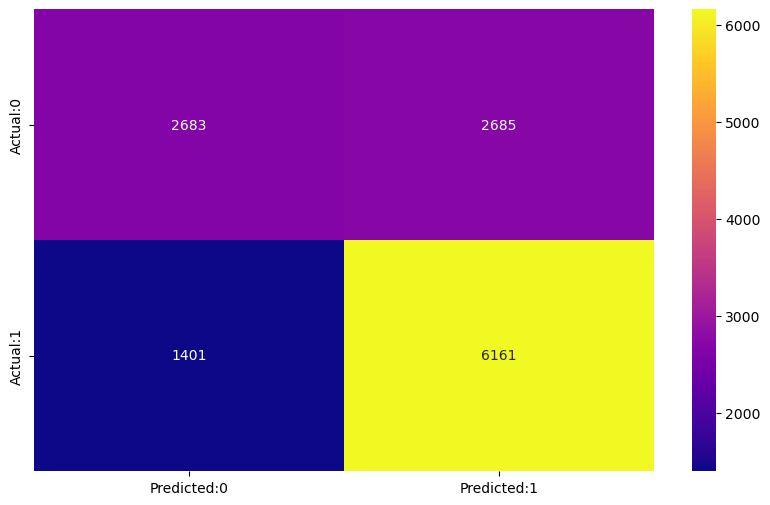

In [49]:
conf_matrix=pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="plasma")
plt.show()

In [50]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [51]:
#Sensitivity recall for positive class
sensitivity=TP/(FN+TP)
sensitivity

0.8147315524993388

In [52]:
#Specificity is recall for negative class
specificity=TN/(TN+FP)
specificity

0.49981371087928467

In [53]:
from sklearn.metrics import recall_score
recall_score(ytest,ypred)

0.8147315524993388

In [54]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57      5368
           1       0.70      0.81      0.75      7562

    accuracy                           0.68     12930
   macro avg       0.68      0.66      0.66     12930
weighted avg       0.68      0.68      0.67     12930



In [55]:
# Support means number of observations in 0 and number of observations in 1
# 1's are always minority class
# 0's are always majority class
# Our area of interst is always the minority class

In [56]:
from sklearn.metrics import log_loss
print(log_loss(ytest,ypred))

10.914739927974102


In [57]:
from sklearn.metrics import roc_curve,roc_auc_score

In [58]:
print(roc_curve(ytest,ypred_prob))
# Output is the TPR,FPR,Threshold

(array([0.        , 0.        , 0.        , ..., 0.99906855, 0.99962742,
       1.        ]), array([0.00000000e+00, 1.32240148e-04, 2.64480296e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), array([1.95524051, 0.95524051, 0.95522418, ..., 0.04550204, 0.0449384 ,
       0.03993732]))


In [59]:
fpr,tpr,threshold=roc_curve(ytest,ypred_prob)

0.7371383276292042


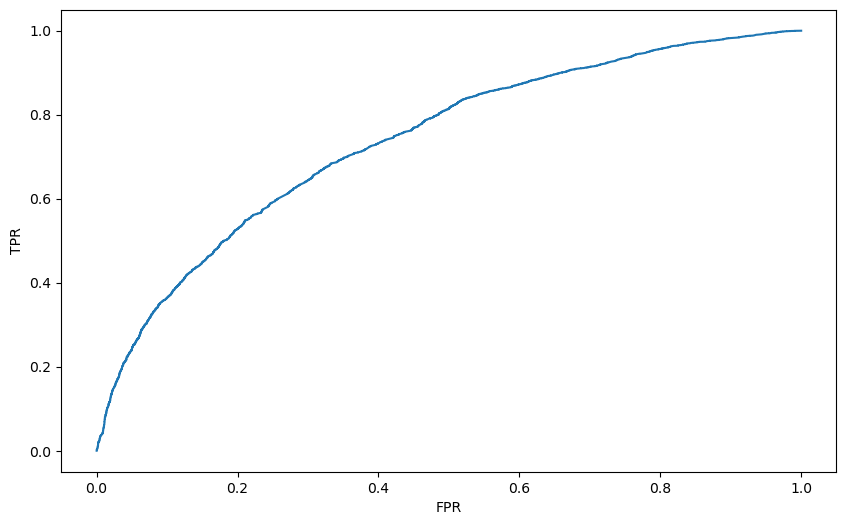

In [60]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
print(roc_auc_score(ytest,ypred_prob))
plt.show()

In [61]:
from sklearn.metrics import cohen_kappa_score

In [62]:
print(cohen_kappa_score(ytest,ypred))
# Since the value is lesser than 0.4 hence it is not a good model

0.325852150664139


In [63]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [64]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [65]:
def per_measures(model,test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    # aic         =model.aic
    # reliability = cohen_kappa_score(test,pred)
    return (accuracy,recall,precision,f1score)

In [66]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [67]:
update_performance(name="LogisticReg-Base",model=logreg,test=ytest,pred=ypred)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975


In [68]:
youdens_table=pd.DataFrame({"TPR":tpr,"FPR":fpr,"Threshold":threshold})
youdens_table["Difference"]=youdens_table.TPR-youdens_table.FPR
youdens_table=youdens_table.sort_values("Difference",ascending=False).reset_index(drop=True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.683682,0.332340,0.595688,0.351342
1,0.683814,0.332526,0.595653,0.351288
2,0.683682,0.332526,0.595676,0.351155
3,0.684475,0.333458,0.594770,0.351017
4,0.683020,0.332154,0.596076,0.350867


In [69]:
y_pred_youden=[0 if x<0.59 else 1 for x in ypred_prob]

In [70]:
acc_table=classification_report(ytest,y_pred_youden)
print(acc_table)

              precision    recall  f1-score   support

           0       0.60      0.66      0.63      5368
           1       0.74      0.69      0.71      7562

    accuracy                           0.68     12930
   macro avg       0.67      0.67      0.67     12930
weighted avg       0.68      0.68      0.68     12930



In [71]:
update_performance(name="LogisticReg-Youden",model=logreg,test=ytest,pred=y_pred_youden)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr_train=lr.predict(xtrain)
ypred_lr=lr.predict(xtest)
ypred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
print(accuracy_score(ytrain,ypred_lr_train))
print(confusion_matrix(ytrain,ypred_lr_train))
print(classification_report(ytrain,ypred_lr_train))

0.6871116611235724
[[ 8051  7854]
 [ 4282 18600]]
              precision    recall  f1-score   support

           0       0.65      0.51      0.57     15905
           1       0.70      0.81      0.75     22882

    accuracy                           0.69     38787
   macro avg       0.68      0.66      0.66     38787
weighted avg       0.68      0.69      0.68     38787



In [75]:
print(accuracy_score(ytest,ypred_lr ))
print(confusion_matrix(ytest,ypred_lr ))
print(classification_report(ytest,ypred_lr ))

0.6836813611755607
[[2682 2686]
 [1404 6158]]
              precision    recall  f1-score   support

           0       0.66      0.50      0.57      5368
           1       0.70      0.81      0.75      7562

    accuracy                           0.68     12930
   macro avg       0.68      0.66      0.66     12930
weighted avg       0.68      0.68      0.67     12930



In [76]:
update_performance(name="LogisticReg-skl",model=lr,test=ytest,pred=ypred_lr)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701


In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [79]:
ypred_knn_trn=knn.predict(xtrain)
print(accuracy_score(ytrain,ypred_knn_trn))
print(confusion_matrix(ytrain,ypred_knn_trn))
print(classification_report(ytrain,ypred_knn_trn))

0.798308711681749
[[11553  4352]
 [ 3471 19411]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     15905
           1       0.82      0.85      0.83     22882

    accuracy                           0.80     38787
   macro avg       0.79      0.79      0.79     38787
weighted avg       0.80      0.80      0.80     38787



In [80]:
ypred_knn_tst=knn.predict(xtest)
print(accuracy_score(ytest,ypred_knn_tst))
print(confusion_matrix(ytest,ypred_knn_tst))
print(classification_report(ytest,ypred_knn_tst))

0.7361948955916473
[[3505 1863]
 [1548 6014]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      5368
           1       0.76      0.80      0.78      7562

    accuracy                           0.74     12930
   macro avg       0.73      0.72      0.73     12930
weighted avg       0.73      0.74      0.73     12930



In [81]:
df["online_order"].value_counts(normalize=True)

1    0.588665
0    0.411335
Name: online_order, dtype: float64

In [82]:
update_performance(name="KNearestNeighbour",model=knn,test=ytest,pred=ypred_knn_tst)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066


In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,xtrain,ytrain,scoring="accuracy")
score

array([0.73008507, 0.73163186, 0.73842981, 0.7269563 , 0.73417558])

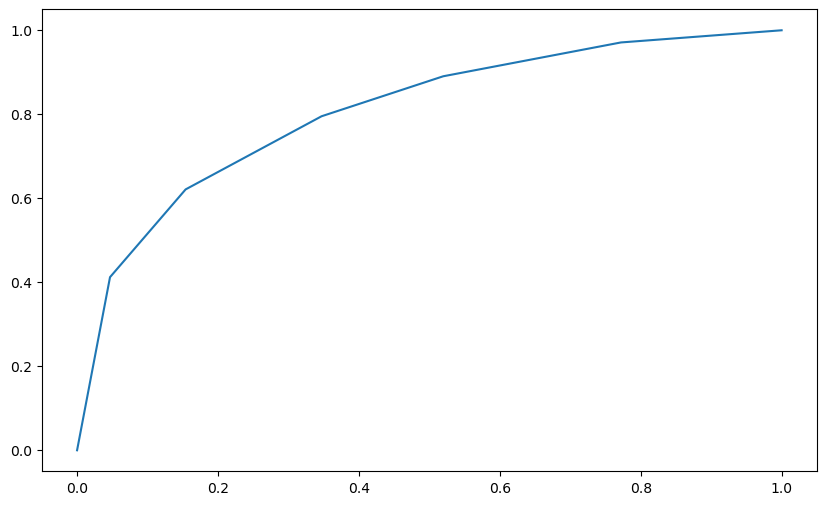

0.8068077982074463


In [84]:
ypred_prob_knn=knn.predict_proba(xtest)
ypred_prob_knn
ypred_prob_knn_1=ypred_prob_knn[:,1]
fpr,tpr,threshold=roc_curve(ytest,ypred_prob_knn_1)
plt.plot(fpr,tpr)
plt.show()
print(roc_auc_score(ytest,ypred_prob_knn_1))

In [85]:
pars = {'n_neighbors':[6,8,10,12],
       'metric':['minkowski','euclidean','manhattan']}

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
grid_knn=GridSearchCV(KNeighborsClassifier(),param_grid=pars,refit=True,verbose=1)
grid_knn.fit(xtrain,ytrain)
grid_knn.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'metric': 'manhattan', 'n_neighbors': 12}

In [88]:
knn_grid=KNeighborsClassifier(n_neighbors=12,metric="manhattan")
knn_grid.fit(xtrain,ytrain)
print("Classification report Train Set:")
print(classification_report(ytrain,knn_grid.predict(xtrain)))

Classification report Train Set:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72     15905
           1       0.81      0.78      0.79     22882

    accuracy                           0.76     38787
   macro avg       0.76      0.76      0.76     38787
weighted avg       0.77      0.76      0.76     38787



In [89]:
print("Classification report Test Set:")
print(classification_report(ytest,knn_grid.predict(xtest)))

Classification report Test Set:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      5368
           1       0.78      0.74      0.76      7562

    accuracy                           0.73     12930
   macro avg       0.72      0.72      0.72     12930
weighted avg       0.73      0.73      0.73     12930



In [90]:
ypred_knn=knn_grid.predict(xtest)

In [91]:
update_performance(name="KNearestNeighbour_grid",model=knn_grid,test=ytest,pred=ypred_knn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959


In [92]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 

In [93]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
ypred_gnb_train=gnb.predict(xtrain)
print(accuracy_score(ytrain,ypred_gnb_train))
print(confusion_matrix(ytrain,ypred_gnb_train))
print(classification_report(ytrain,ypred_gnb_train))

0.6269368602882409
[[ 3703 12202]
 [ 2268 20614]]
              precision    recall  f1-score   support

           0       0.62      0.23      0.34     15905
           1       0.63      0.90      0.74     22882

    accuracy                           0.63     38787
   macro avg       0.62      0.57      0.54     38787
weighted avg       0.62      0.63      0.58     38787



In [94]:
ypred_gnb_test=gnb.predict(xtest)
print(accuracy_score(ytest,ypred_gnb_test))
print(confusion_matrix(ytest,ypred_gnb_test))
print(classification_report(ytest,ypred_gnb_test))

0.6160866202629544
[[1199 4169]
 [ 795 6767]]
              precision    recall  f1-score   support

           0       0.60      0.22      0.33      5368
           1       0.62      0.89      0.73      7562

    accuracy                           0.62     12930
   macro avg       0.61      0.56      0.53     12930
weighted avg       0.61      0.62      0.56     12930



In [95]:
update_performance(name="Gaussian NB",model=gnb,test=ytest,pred=ypred_gnb_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647


In [96]:
bnb=BernoulliNB()
bnb.fit(xtrain,ytrain)
ypred_bnb_train=bnb.predict(xtrain)
print(accuracy_score(ytrain,ypred_bnb_train))
print(confusion_matrix(ytrain,ypred_bnb_train))
print(classification_report(ytrain,ypred_bnb_train))

0.6663057209889911
[[ 7535  8370]
 [ 4573 18309]]
              precision    recall  f1-score   support

           0       0.62      0.47      0.54     15905
           1       0.69      0.80      0.74     22882

    accuracy                           0.67     38787
   macro avg       0.65      0.64      0.64     38787
weighted avg       0.66      0.67      0.66     38787



In [97]:
ypred_bnb_test=bnb.predict(xtest)
print(accuracy_score(ytest,ypred_bnb_test))
print(confusion_matrix(ytest,ypred_bnb_test))
print(classification_report(ytest,ypred_bnb_test))

0.6672080433101315
[[2543 2825]
 [1478 6084]]
              precision    recall  f1-score   support

           0       0.63      0.47      0.54      5368
           1       0.68      0.80      0.74      7562

    accuracy                           0.67     12930
   macro avg       0.66      0.64      0.64     12930
weighted avg       0.66      0.67      0.66     12930



In [98]:
update_performance(name="Bernoulli NB",model=bnb,test=ytest,pred=ypred_bnb_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753


In [99]:
df1=df.drop(columns=["url","address","name","phone","location","rest_type","dish_liked","cuisines","reviews_list","menu_item","listed_in(city)","online_order"])
x=scaled_df.drop(columns=["online_order"])
y=scaled_df["online_order"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10)

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt=DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)
ypred_dt_train=dt.predict(xtrain)
print(accuracy_score(ytrain,ypred_dt_train))
print(confusion_matrix(ytrain,ypred_dt_train))
print(classification_report(ytrain,ypred_dt_train))

0.9001469564544822
[[14857  1048]
 [ 2825 20057]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     15905
           1       0.95      0.88      0.91     22882

    accuracy                           0.90     38787
   macro avg       0.90      0.91      0.90     38787
weighted avg       0.91      0.90      0.90     38787



In [102]:
dt=DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)
ypred_dt_test=dt.predict(xtest)
print(accuracy_score(ytest,ypred_dt_test))
print(confusion_matrix(ytest,ypred_dt_test))
print(classification_report(ytest,ypred_dt_test))

0.7810518174787316
[[4330 1038]
 [1793 5769]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      5368
           1       0.85      0.76      0.80      7562

    accuracy                           0.78     12930
   macro avg       0.78      0.78      0.78     12930
weighted avg       0.79      0.78      0.78     12930



In [103]:
update_performance(name="Decision Tree-Gini",model=dt,test=ytest,pred=ypred_dt_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979


In [104]:
from sklearn import tree

In [105]:
dt_e=DecisionTreeClassifier(criterion="entropy",random_state=10)
dt_e.fit(xtrain,ytrain)
ypred_dt_e=dt_e.predict(xtest)
print(accuracy_score(ytest,ypred_dt_e))
print(confusion_matrix(ytest,ypred_dt_e))
print(classification_report(ytest,ypred_dt_e))

0.7821345707656613
[[4333 1035]
 [1782 5780]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      5368
           1       0.85      0.76      0.80      7562

    accuracy                           0.78     12930
   macro avg       0.78      0.79      0.78     12930
weighted avg       0.79      0.78      0.78     12930



In [106]:
update_performance(name="Decision Tree-Entropy",model=dt_e,test=ytest,pred=ypred_dt_e)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062


In [107]:
dt_e3=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=10)
dt_e3.fit(xtrain,ytrain)
ypred_dt_e3=dt_e3.predict(xtrain)
print(accuracy_score(ytrain,ypred_dt_e3))
print(confusion_matrix(ytrain,ypred_dt_e3))
print(classification_report(ytrain,ypred_dt_e3))

0.7220460463557378
[[ 9618  6287]
 [ 4494 18388]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64     15905
           1       0.75      0.80      0.77     22882

    accuracy                           0.72     38787
   macro avg       0.71      0.70      0.71     38787
weighted avg       0.72      0.72      0.72     38787



In [108]:
dt_e3=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=10)
dt_e3.fit(xtrain,ytrain)
ypred_dt_e3=dt_e3.predict(xtest)
print(accuracy_score(ytest,ypred_dt_e3))
print(confusion_matrix(ytest,ypred_dt_e3))
print(classification_report(ytest,ypred_dt_e3))

0.7208816705336427
[[3292 2076]
 [1533 6029]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.65      5368
           1       0.74      0.80      0.77      7562

    accuracy                           0.72     12930
   macro avg       0.71      0.71      0.71     12930
weighted avg       0.72      0.72      0.72     12930



In [109]:
feature_imp=pd.DataFrame()
feature_imp["Feature"]=xtrain.columns
feature_imp["Importance"]=dt.feature_importances_
feature_imp

,Feature,Importance
0,rate,0.148818
1,votes,0.396916
2,approx_cost(for two people),0.191712
3,book_table_Yes,0.012348
4,listed_in(type)_Cafes,0.004010
5,listed_in(type)_Delivery,0.113563
6,listed_in(type)_Desserts,0.010232
7,listed_in(type)_Dine-out,0.010980
8,listed_in(type)_Drinks & nightlife,0.003695
9,listed_in(type)_Pubs and bars,0.002242


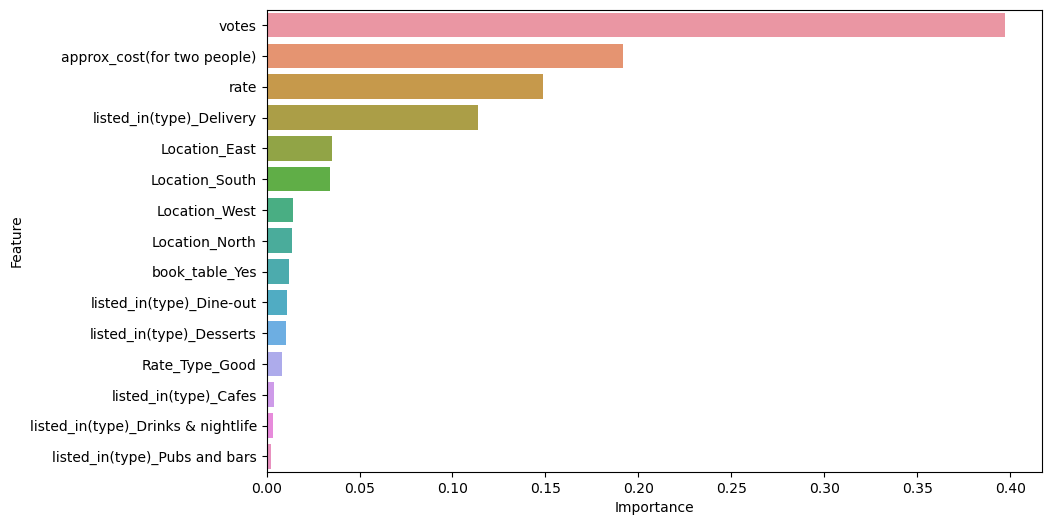

In [110]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)
sns.barplot(x="Importance",y="Feature",data=feature_imp)
plt.show()

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
tuned_parameters=[{"criterion":["entropy","gini"],"max_depth":[2,3,5,6,7,8,9,10]}]

In [113]:
dt=DecisionTreeClassifier(random_state=10)
tree_grid=GridSearchCV(estimator=dt,param_grid=tuned_parameters,cv=5)
tree_grid_model=tree_grid.fit(xtrain,ytrain)
print("Best parameters for decision tree classifier:",tree_grid_model.best_params_)

Best parameters for decision tree classifier: {'criterion': 'gini', 'max_depth': 10}


In [114]:
ypred_dt_tp=tree_grid_model.predict(xtest)
print(accuracy_score(ytest,ypred_dt_tp))
print(confusion_matrix(ytest,ypred_dt_tp))
print(classification_report(ytest,ypred_dt_tp))

0.7393658159319412
[[3480 1888]
 [1482 6080]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      5368
           1       0.76      0.80      0.78      7562

    accuracy                           0.74     12930
   macro avg       0.73      0.73      0.73     12930
weighted avg       0.74      0.74      0.74     12930



In [115]:
tuned_parameters = [{'criterion': ['entropy','gini'],
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]

In [116]:
dt=DecisionTreeClassifier(random_state=10)
tree_grid=GridSearchCV(estimator=dt,param_grid=tuned_parameters,cv=5)
tree_grid_model=tree_grid.fit(xtrain,ytrain)
print("Best parameters for decision tree classifier:",tree_grid_model.best_params_)

Best parameters for decision tree classifier: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [117]:
ypred_dt_tp=tree_grid_model.predict(xtest)
print(accuracy_score(ytest,ypred_dt_tp))
print(confusion_matrix(ytest,ypred_dt_tp))
print(classification_report(ytest,ypred_dt_tp))

0.6522041763341068
[[2067 3301]
 [1196 6366]]
              precision    recall  f1-score   support

           0       0.63      0.39      0.48      5368
           1       0.66      0.84      0.74      7562

    accuracy                           0.65     12930
   macro avg       0.65      0.61      0.61     12930
weighted avg       0.65      0.65      0.63     12930



In [118]:
dt_grid_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 5,
                                  min_samples_leaf = 9,
                                  min_samples_split = 2,
                                  random_state = 10)
dt_grid_model=dt_grid_model.fit(xtrain,ytrain)

In [119]:
ypred_dt_tp=dt_grid_model.predict(xtest)
print(accuracy_score(ytest,ypred_dt_tp))
print(confusion_matrix(ytest,ypred_dt_tp))
print(classification_report(ytest,ypred_dt_tp))

0.6393658159319412
[[1813 3555]
 [1108 6454]]
              precision    recall  f1-score   support

           0       0.62      0.34      0.44      5368
           1       0.64      0.85      0.73      7562

    accuracy                           0.64     12930
   macro avg       0.63      0.60      0.59     12930
weighted avg       0.63      0.64      0.61     12930



In [120]:
update_performance(name="Decision Tree-Tuned",model=dt_grid_model,test=ytest,pred=ypred_dt_tp)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf=RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=10)

In [123]:
ypred_rf_train=rf.predict(xtrain)
print(accuracy_score(ytrain,ypred_rf_train))
print(confusion_matrix(ytrain,ypred_rf_train))
print(classification_report(ytrain,ypred_rf_train))

0.9000953927862428
[[14607  1298]
 [ 2577 20305]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     15905
           1       0.94      0.89      0.91     22882

    accuracy                           0.90     38787
   macro avg       0.89      0.90      0.90     38787
weighted avg       0.90      0.90      0.90     38787



In [124]:
ypred_rf_test=rf.predict(xtest)
print(accuracy_score(ytest,ypred_rf_test))
print(confusion_matrix(ytest,ypred_rf_test))
print(classification_report(ytest,ypred_rf_test))

0.788553750966744
[[4191 1177]
 [1557 6005]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      5368
           1       0.84      0.79      0.81      7562

    accuracy                           0.79     12930
   macro avg       0.78      0.79      0.78     12930
weighted avg       0.79      0.79      0.79     12930



In [125]:
update_performance(name="Random Forest",model=rf,test=ytest,pred=ypred_rf_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [126]:
rf=RandomForestClassifier(oob_score=True,random_state=10)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(accuracy_score(ytest,ypred_rf))
print(rf.oob_score_) # if out of bag score is high then is signfies that the model is good

0.788553750966744
0.7944672183979168


In [127]:
params=[{"criterion":["entropy","gini"],
        "n_estimators":[100],
        "max_depth":[10,15],
        "max_features":["sqrt","log2"],
        "min_samples_split":[2,8],
        "min_samples_leaf":[5,9],
        "max_leaf_nodes":[8,11]}]

In [128]:
rf=RandomForestClassifier(random_state=10)
rf_cv=GridSearchCV(estimator=rf,param_grid=params,cv=5,scoring="accuracy")
rf_cv.fit(xtrain,ytrain)
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [129]:
rf_model = RandomForestClassifier(criterion ='gini' ,
                                  n_estimators =100 ,
                                  max_depth = 10 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =11 ,
                                  min_samples_leaf =5 ,
                                  min_samples_split = 2,
                                  random_state = 10)
rf_model.fit(xtrain,ytrain)
ypred_rf_tp=rf_model.predict(xtest)
print(accuracy_score(ytest,ypred_rf_tp))
print(confusion_matrix(ytest,ypred_rf_tp))
print(classification_report(ytest,ypred_rf_tp))

0.7159319412219645
[[3020 2348]
 [1325 6237]]
              precision    recall  f1-score   support

           0       0.70      0.56      0.62      5368
           1       0.73      0.82      0.77      7562

    accuracy                           0.72     12930
   macro avg       0.71      0.69      0.70     12930
weighted avg       0.71      0.72      0.71     12930



In [130]:
update_performance(name="Random Forest-Tunned",model=rf_model,test=ytest,pred=ypred_rf_tp)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [131]:
from sklearn.ensemble import BaggingClassifier

In [132]:
dt=DecisionTreeClassifier(random_state=10)
bc=BaggingClassifier(dt)
bc.fit(xtrain,ytrain)
ypred_bc=bc.predict(xtest)
print(accuracy_score(ytest,ypred_bc))

0.7894818252126837


In [133]:
update_performance(name="Bagging Classifier-dt",model=bc,test=ytest,pred=ypred_bc)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [134]:
knn=KNeighborsClassifier()
bag_knn=BaggingClassifier(knn,random_state=10)
bag_knn.fit(xtrain,ytrain)
ypred_bag_knn=bag_knn.predict(xtest)
print(accuracy_score(ytest,ypred_bag_knn))

0.7461716937354989


In [135]:
update_performance(name="Bagging Classifier-knn",model=bag_knn,test=ytest,pred=ypred_bag_knn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [136]:
lr=LogisticRegression()
bag_logr=BaggingClassifier(lr,random_state=10)
bag_logr.fit(xtrain,ytrain)
ypred_bag_logr=bag_logr.predict(xtest)
print(accuracy_score(ytest,ypred_bag_logr))

0.6845320959010054


In [137]:
update_performance(name="Bagging Classifier-Log",model=bag_logr,test=ytest,pred=ypred_bag_logr)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [138]:
from sklearn.ensemble import AdaBoostClassifier

In [139]:
abc1=AdaBoostClassifier(dt,random_state=10)
abc1.fit(xtrain,ytrain)
ypred_abc1=abc1.predict(xtest)
print(accuracy_score(ytest,ypred_abc1))

0.7984532095901006


In [140]:
update_performance(name="AdaBoost-dt",model=abc1,test=ytest,pred=ypred_abc1)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [141]:
abc1_rf=AdaBoostClassifier(rf_model,random_state=10)
abc1_rf.fit(xtrain,ytrain)
ypred_abc1_rf=abc1_rf.predict(xtest)
print(accuracy_score(ytest,ypred_abc1_rf))

0.7460170146945089


In [142]:
update_performance(name="AdaBoost-rf",model=abc1_rf,test=ytest,pred=ypred_abc1_rf)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [143]:
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
gbc1=GradientBoostingClassifier(n_estimators=50,random_state=10)
gbc1.fit(xtrain,ytrain)
ypred_gbc1=gbc1.predict(xtest)
print(accuracy_score(ytest,ypred_gbc1))

0.7305491105955143


In [145]:
gbc1=GradientBoostingClassifier(n_estimators=50,learning_rate=0.5,random_state=10,max_depth=3)
gbc1.fit(xtrain,ytrain)
ypred_gbc1=gbc1.predict(xtest)
print(accuracy_score(ytest,ypred_gbc1))

0.7402165506573859


In [146]:
update_performance(name="Gradient Boosting",model=gbc1,test=ytest,pred=ypred_gbc1)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620


In [147]:
from xgboost import XGBClassifier

In [148]:
xgb=XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)
ypred_xgb=xgb.predict(xtest)
print(accuracy_score(ytest,ypred_xgb))

0.7754833720030936


In [149]:
xgb=XGBClassifier(booster="gbtree",gamma=3,max_depth=3,min_child_weight=3,n_estimators=50,reg_lambda=1,random_state=10)
xgb.fit(xtrain,ytrain)
ypred_xgb=xgb.predict(xtest)
print(accuracy_score(ytest,ypred_xgb))

0.7355761794276875


In [150]:
update_performance(name="XGB",model=xgb,test=ytest,pred=ypred_xgb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.683991,0.814732,0.696473,0.750975
1,LogisticReg-Youden,0.676798,0.692145,0.738744,0.714686
2,LogisticReg-skl,0.683681,0.814335,0.696291,0.750701
3,KNearestNeighbour,0.736195,0.795292,0.763489,0.779066
4,KNearestNeighbour_grid,0.726295,0.744909,0.777716,0.760959
5,Gaussian NB,0.616087,0.894869,0.618782,0.731647
6,Bernoulli NB,0.667208,0.804549,0.682905,0.738753
7,Decision Tree-Gini,0.781052,0.762893,0.847510,0.802979
8,Decision Tree-Entropy,0.782135,0.764348,0.848129,0.804062
9,Decision Tree-Tuned,0.639366,0.853478,0.644820,0.734620
